In [13]:
%matplotlib inline
#%matplotlib notebook
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [14]:
df = pd.read_csv('../../data/training.csv') 

In [3]:
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [49]:
df['RefId'].describe()

count    58386.000000
mean     36567.888449
std      21092.254801
min          1.000000
25%      18270.250000
50%      36608.500000
75%      54811.500000
max      73014.000000
Name: RefId, dtype: float64

In [50]:
df['RefId'].value_counts()

2047     1
15058    1
10960    1
53967    1
56014    1
        ..
52787    1
50738    1
56881    1
54832    1
2049     1
Name: RefId, Length: 58386, dtype: int64

## Missing Values

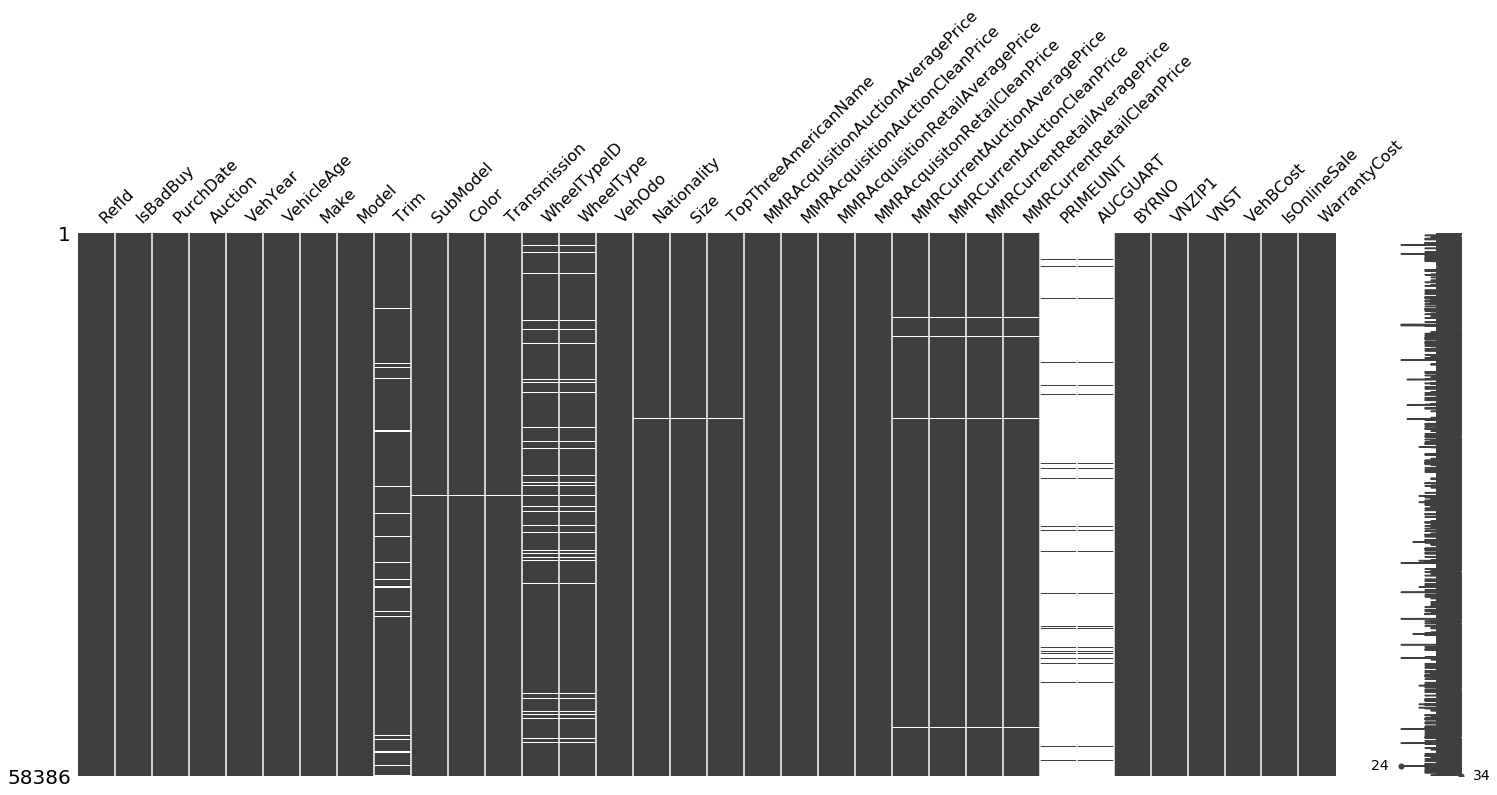

In [107]:
msno.matrix(df)

In [25]:
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 34 columns):
RefId                                58386 non-null int64
IsBadBuy                             58386 non-null int64
PurchDate                            58386 non-null object
Auction                              58386 non-null object
VehYear                              58386 non-null int64
VehicleAge                           58386 non-null int64
Make                                 58386 non-null object
Model                                58386 non-null object
Trim                                 56475 non-null object
SubModel                             58379 non-null object
Color                                58379 non-null object
Transmission                         58378 non-null object
WheelTypeID                          55813 non-null float64
WheelType                            55809 non-null object
VehOdo                               58386 non-null int64
Nationalit

## Correlation

In [50]:
data = df

In [51]:
del data['RefId']
del data['IsBadBuy']
del data['VehicleAge']
del data['BYRNO']
del data['IsOnlineSale']
del data['WarrantyCost']
del data['PRIMEUNIT']
del data['AUCGUART']
del data['VNZIP1']
del data['VehYear']
del data['PurchDate']
del data['Trim']
del data['TopThreeAmericanName']
del data['WheelType']
data.corr()

,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost
WheelTypeID,1.000000,-0.212432,-0.094658,-0.129608,-0.071736,-0.101796,-0.086798,-0.120046,-0.072684,-0.101250,-0.160986
VehOdo,-0.212432,1.000000,-0.018381,0.023717,0.029107,0.061407,-0.030141,0.010755,0.013719,0.046070,-0.064436
MMRAcquisitionAuctionAveragePrice,-0.094658,-0.018381,1.000000,0.990218,0.910185,0.909832,0.937482,0.931919,0.871220,0.870424,0.789354
MMRAcquisitionAuctionCleanPrice,-0.129608,0.023717,0.990218,1.000000,0.902339,0.917934,0.923144,0.931599,0.860055,0.870604,0.781123
MMRAcquisitionRetailAveragePrice,-0.071736,0.029107,0.910185,0.902339,1.000000,0.990085,0.851330,0.848776,0.912747,0.905523,0.745718
MMRAcquisitonRetailCleanPrice,-0.101796,0.061407,0.909832,0.917934,0.990085,1.000000,0.846393,0.854986,0.902680,0.906231,0.744622
MMRCurrentAuctionAveragePrice,-0.086798,-0.030141,0.937482,0.923144,0.851330,0.846393,1.000000,0.990244,0.915147,0.912305,0.778253
MMRCurrentAuctionCleanPrice,-0.120046,0.010755,0.931919,0.931599,0.848776,0.854986,0.990244,1.000000,0.908620,0.921638,0.774637
MMRCurrentRetailAveragePrice,-0.072684,0.013719,0.871220,0.860055,0.912747,0.902680,0.915147,0.908620,1.000000,0.989693,0.756790
MMRCurrentRetailCleanPrice,-0.101250,0.046070,0.870424,0.870604,0.905523,0.906231,0.912305,0.921638,0.989693,1.000000,0.756551


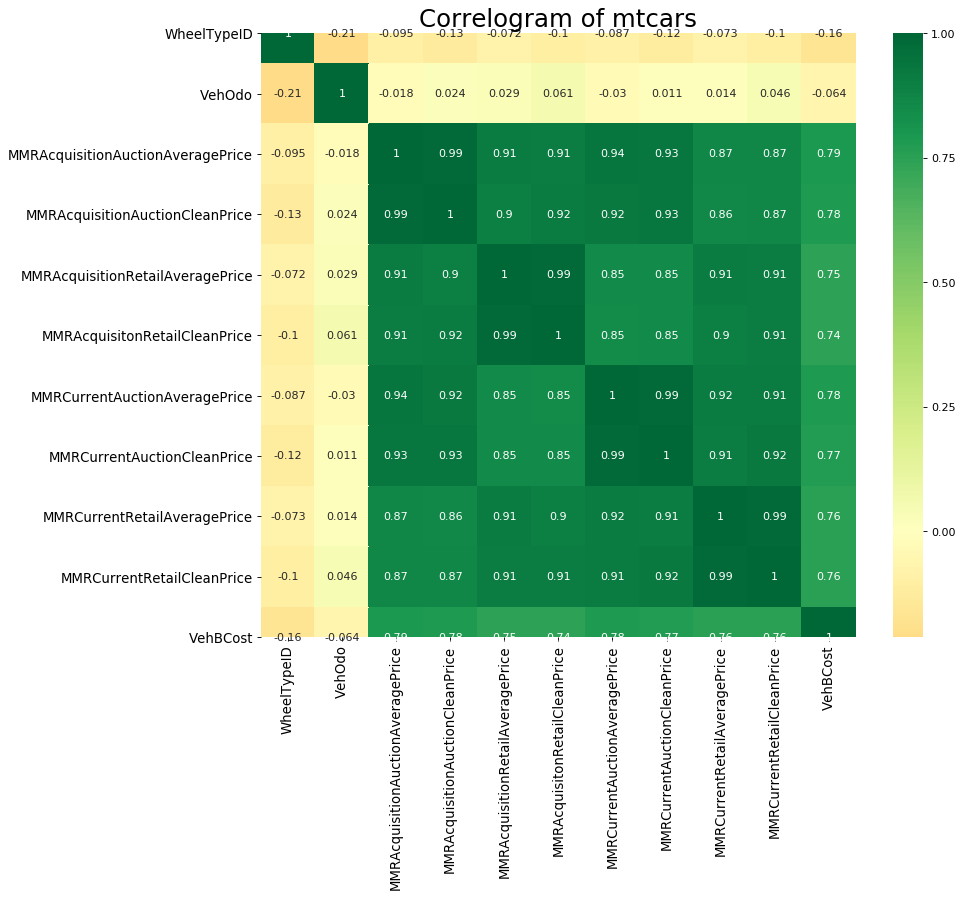

In [52]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Data Exploration

### - IsBadBuy
This feature identifies if the kicked vehicle was an avoidable purchase.

Categorical-Nominal type attribute (discrete numerical value)

0 -> good

1 -> bad

Highly imbalanced

In [30]:
temp = df['IsBadBuy'].value_counts()
total = temp[0] + temp[1]
x = ["Good", "Bad"]
y = [temp[0]/total*100, temp[1]/total*100]
print(x)
print(y)

['Good', 'Bad']
[87.65457472681807, 12.345425273181927]


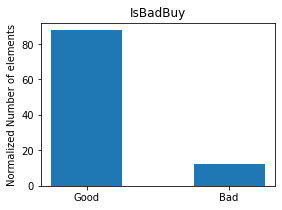

In [56]:
#(df['IsBadBuy'].value_counts(normalize=True)*100).plot(kind='bar',
 #                                  title='IsBadBuy')
plt.figure(figsize=(4.2,3))
plt.bar(x,y, width = 0.5)
plt.title("IsBadBuy")
plt.ylabel('Normalized Number of elements')
plt.show() 

<p>In the data set there is an unbalanced distribution for IsBadBuy values.</p>
<p>
During the construction and evaluation of classification models, yes
they will have to balance the values ​​of this attribute so as to be able to evaluate their efficiency with the different distributions
of class values.</p>

### - Auction

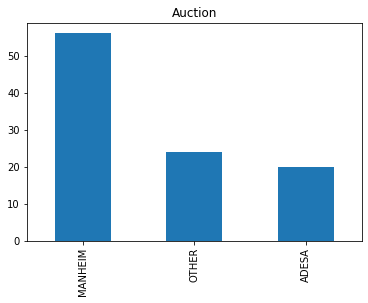

In [29]:
(df['Auction'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Auction')
plt.show() 

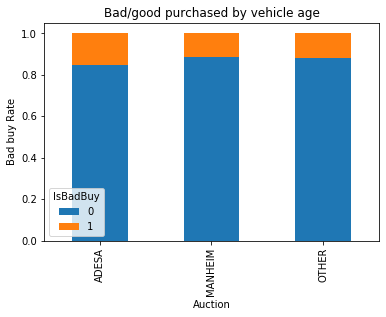

In [32]:
vage_xt = pd.crosstab(df['Auction'], df['IsBadBuy'])
vage_xt_pct = vage_xt.div(vage_xt.sum(1).astype(float), axis=0)
vage_xt_pct.plot(kind='bar', stacked=True, 
                   title='Bad/good purchased by vehicle age')
plt.xlabel('Auction')
plt.ylabel('Bad buy Rate')
plt.show()

In [110]:
df['Auction'].value_counts(normalize=True)

MANHEIM    0.560751
OTHER      0.239681
ADESA      0.199568
Name: Auction, dtype: float64

### - VehicleAge

In [34]:
df['VehicleAge'].describe()

count    58386.000000
mean         4.174956
std          1.713833
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: VehicleAge, dtype: float64

Text(0, 0.5, 'Number of elements')

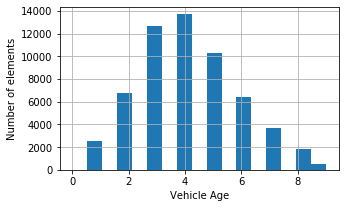

In [69]:
plt.figure(figsize=(5,3))
df['VehicleAge'].hist(bins=17)
plt.xlabel('Vehicle Age')
plt.ylabel('Number of elements')

In [58]:
# vage
vage_xt = pd.crosstab(df['VehicleAge'], df['IsBadBuy']) #the result of this corsstable will be assigned to a variable
#vage_xt

In [59]:
# Normalize the cross tab to sum to 1:
vage_xt_pct = vage_xt.div(vage_xt.sum(1).astype(float), axis=0)
#vage_xt_pct

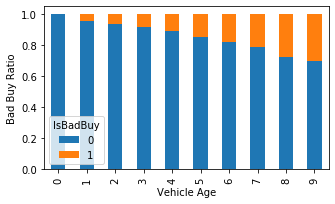

In [86]:
#Then I can visualize it with a bar plot (staked: different values in the same bar)
vage_xt_pct.plot(kind='bar', stacked=True, figsize=(5.1,3))
plt.xlabel('Vehicle Age')
plt.ylabel('Bad Buy Ratio')
plt.show()

<p>The distribution of vehicle age values presents a peak of occurrences for 4 years.</p>
<p>The percentage of incorrect purchases increases with the age of the vehicle.</p>

### - Make

In [36]:
df['Make'].unique() #all values of an attribute

array(['KIA', 'DODGE', 'FORD', 'CHRYSLER', 'NISSAN', 'SUZUKI', 'PONTIAC',
       'CHEVROLET', 'SATURN', 'BUICK', 'MITSUBISHI', 'HONDA', 'HYUNDAI',
       'MERCURY', 'GMC', 'JEEP', 'OLDSMOBILE', 'MAZDA', 'TOYOTA', 'ISUZU',
       'ACURA', 'VOLVO', 'INFINITI', 'SCION', 'CADILLAC', 'LINCOLN',
       'VOLKSWAGEN', 'SUBARU', 'MINI', 'LEXUS', 'PLYMOUTH',
       'TOYOTA SCION', 'HUMMER'], dtype=object)

<p>TOYOTA SCION: SCION is a TOYOTA brand of cars. There is no manufacturer on the market with both names and in fact in the dataset it occurred only once, confirming its nature as a semantic error. The value could be corrected in "SCION" since he is the Toyota manufacturer.</p>

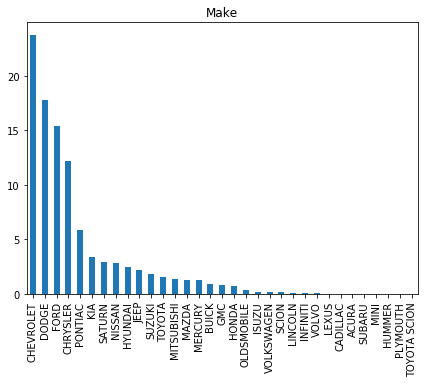

In [184]:
(df['Make'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Make', figsize=(7,5))
plt.show() 

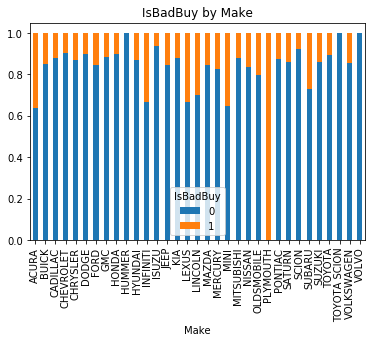

In [41]:
vage_xt = pd.crosstab(df['Make'], df['IsBadBuy'])
vage_xt_pct = vage_xt.div(vage_xt.sum(1).astype(float), axis=0)
vage_xt_pct.plot(kind='bar', stacked=True, 
                   title='IsBadBuy by Make')
plt.show()

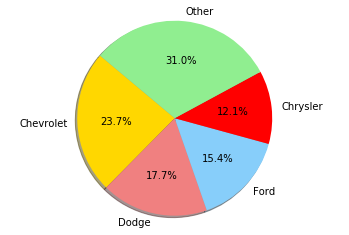

In [116]:
#Pie chart of Make
# Data to plot
labels = 'Chevrolet', 'Dodge', 'Ford', 'Chrysler', 'Other'
sizes = [13842, 10355, 9000, 7093, 18096]
colors = ['gold', 'lightcoral', 'lightskyblue', 'red', 'lightgreen']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<p>The distribution of attribute values for manufacturers presents a preponderance of automobiles a
Chevrolet brand, followed by Dodge, Ford and Chrysler. American cars are the majority (see later).</p>

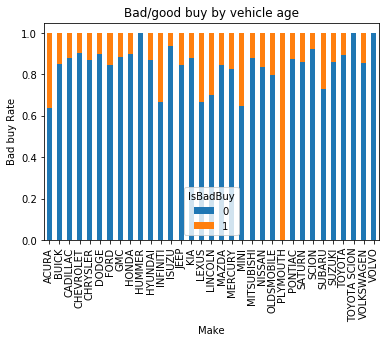

In [117]:
#m
m_xt = pd.crosstab(df['Make'], df['IsBadBuy']) #the result of this corsstable will be assigned to a variable
#m_xt
# Normalize the cross tab to sum to 1:
m_xt_pct = m_xt.div(m_xt.sum(1).astype(float), axis=0)
#m_xt_pct
#Then I can visualize it with a bar plot (staked: different values in the same bar)
m_xt_pct.plot(kind='bar', stacked=True, 
                   title='Bad/good buy by vehicle age')
plt.xlabel('Make')
plt.ylabel('Bad buy Rate')
plt.show()

### - Model

In [118]:
df['Model'].value_counts()

PT CRUISER              1845
IMPALA                  1616
TAURUS                  1154
CALIBER                 1108
CARAVAN GRAND FWD V6    1021
                        ... 
VUE AWD V6 3.0L V6 S       1
CIVIC 1.7L I4 MFI /        1
ACCORD 4C 2.3L I-4 S       1
626 4C 2.0L I4 EFI         1
SILHOUETTE 3.4L V 6        1
Name: Model, Length: 1029, dtype: int64

In [119]:
df['Model'].value_counts()[df['Model'].value_counts() < 10] 

HHR 2.4L I4 MPI         9
G6 V6 3.5L V6 MFI /     9
G35                     9
GALANT 4C Multiple E    9
CAMRY 4C 2.4L I-4 EF    9
                       ..
VUE AWD V6 3.0L V6 S    1
CIVIC 1.7L I4 MFI /     1
ACCORD 4C 2.3L I-4 S    1
626 4C 2.0L I4 EFI      1
SILHOUETTE 3.4L V 6     1
Name: Model, Length: 553, dtype: int64

<p>Model has 1029 possible values</p>

### - Trim

In [120]:
df['Trim'].value_counts()

Bas    11213
LS      8190
SE      7473
SXT     3061
LT      2849
       ...  
JLX        1
Ult        1
LL         1
Maz        1
Out        1
Name: Trim, Length: 131, dtype: int64

<p>Trim has 131 possible values, the most frequent is 'Bas'</p>

### - SubModel

In [121]:
df['SubModel'].value_counts()

4D SEDAN                            12234
4D SEDAN LS                          3828
4D SEDAN SE                          3111
4D WAGON                             1795
MINIVAN 3.3L                          996
                                    ...  
4D SPORT UTILITY TOURING NAV DVD        1
4D SUV 4.0L EDDIE BAUER                 1
4D EXT CAB 4.0L XLT                     1
CREW CAB 3.4L PRERUNNER                 1
EXT CAB 5.4L HERITAGE                   1
Name: SubModel, Length: 839, dtype: int64

<p>SubModel has 839 possible values, the most frequent is '4D SEDAN'</p>

### - Color

In [188]:
df["Color"].describe()

count      58379
unique        16
top       SILVER
freq       11812
Name: Color, dtype: object

In [187]:
df["Color"].value_counts()

SILVER       11812
WHITE         9768
BLUE          8271
GREY          6284
BLACK         6067
RED           5020
GOLD          4244
GREEN         2561
MAROON        1628
BEIGE         1264
BROWN          350
ORANGE         340
PURPLE         294
YELLOW         200
OTHER          199
NOT AVAIL       77
Name: Color, dtype: int64

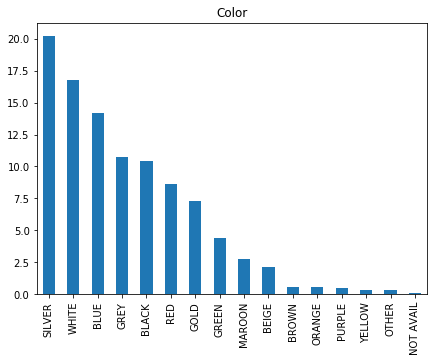

In [122]:
(df['Color'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Color', figsize=(7,5))
plt.show() 

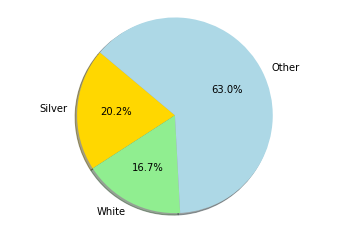

In [189]:
#Pie chart of Transmission
# Data to plot
labels = 'Silver', 'White', 'Other'
sizes = [11812, 9768, 36799]
colors = ['gold', 'lightgreen', 'lightblue']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [123]:
df[df['Color']=='BLACK']['VehBCost'].describe()

count     6067.000000
mean      7135.996702
std       1780.968208
min       1400.000000
25%       5925.000000
50%       7240.000000
75%       8200.000000
max      35900.000000
Name: VehBCost, dtype: float64

<p>The most frequent color is SILVER. BLACK and GREY are the color of ost expensive vehicles.</p>

### - Transmission

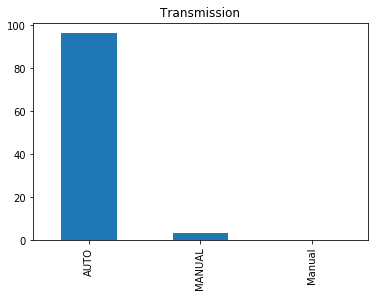

In [124]:
(df['Transmission'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Transmission')
plt.show() 

In [125]:
df['Transmission'].value_counts()

AUTO      56330
MANUAL     2047
Manual        1
Name: Transmission, dtype: int64

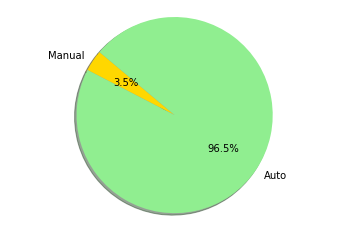

In [126]:
#Pie chart of Transmission
# Data to plot
labels = 'Manual', 'Auto'
sizes = [2048, 56330]
colors = ['gold', 'lightgreen']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

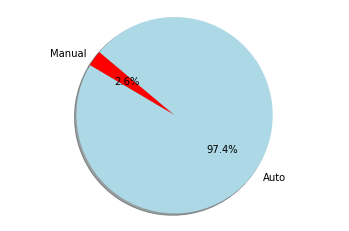

In [127]:
#Pie chart of Transmission in American Cars
# Data to plot
labels = 'Manual', 'Auto'
sizes = [1279, 47513]
colors = ['red', 'lightblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<p>The majority of the vehicles has the AUTO value for transmission.</p>
<p>Is also present a row with value 'Manual' that has to be change in 'MANUAL'.</p>

### - WheelTypeID

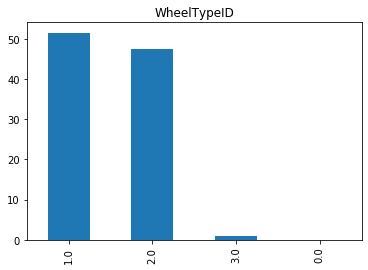

In [128]:
(df['WheelTypeID'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='WheelTypeID')
plt.show() 

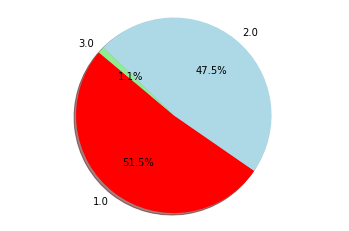

In [195]:
#Pie chart of WheelTypeID
# Data to plot
labels = '1.0', '2.0', '3.0'
sizes = [28735, 26485, 593]
colors = ['red', 'lightblue', 'lightgreen']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [129]:
df['WheelTypeID'].value_counts()

1.0    28735
2.0    26485
3.0      589
0.0        4
Name: WheelTypeID, dtype: int64

<p>WheelTypeID - WheelType</p>
<ul>
    <li> 1.0 - Alloy
    <li> 2.0 - Covers
    <li> 3.0 - Special
    <li> 0.0 - nan (4)
    <li> nan - nan
</ul>

### - WheelType

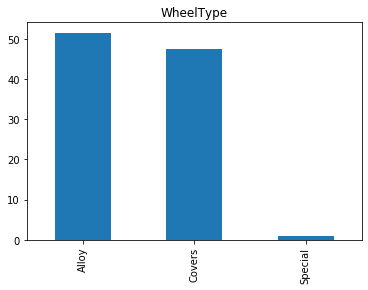

In [130]:
(df['WheelType'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='WheelType')
plt.show() 

In [131]:
df['WheelType'].value_counts()

Alloy      28735
Covers     26485
Special      589
Name: WheelType, dtype: int64

<p>WheelType - WheelTypeID</p>
<ul>
    <li> Alloy - 1.0
    <li> Covers - 2.0
    <li> Special - 3.0
    <li> nan - nan/0.0
</ul>

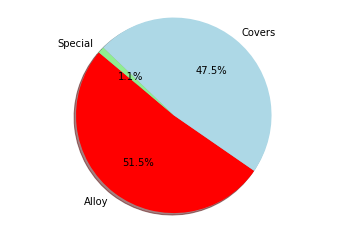

In [193]:
#Pie chart of Transmission in American Cars
# Data to plot
labels = 'Alloy', 'Covers', 'Special'
sizes = [28735, 26485, 589]
colors = ['red', 'lightblue', 'lightgreen']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### - VehOdo

In [47]:
df['VehOdo'].describe()

count     58386.000000
mean      71478.090518
std       14591.224550
min        4825.000000
25%       61785.000000
50%       73359.000000
75%       82427.000000
max      115717.000000
Name: VehOdo, dtype: float64

Text(0, 0.5, 'Number of elements')

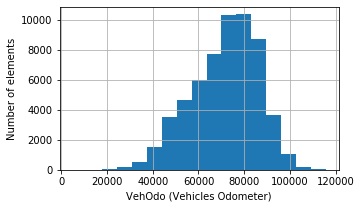

In [87]:
plt.figure(figsize=(5,3))
df['VehOdo'].hist(bins=17)
plt.xlabel('VehOdo (Vehicles Odometer)')
plt.ylabel('Number of elements')

In [134]:
df[df['IsBadBuy']==0]['VehOdo'].describe()

count     51178.000000
mean      71024.369631
std       14592.172133
min        5368.000000
25%       61254.250000
50%       72863.500000
75%       81989.000000
max      112029.000000
Name: VehOdo, dtype: float64

In [135]:
df[df['IsBadBuy']==1]['VehOdo'].describe()

count      7208.000000
mean      74699.584351
std       14173.767373
min        4825.000000
25%       65975.250000
50%       76572.500000
75%       84855.000000
max      115717.000000
Name: VehOdo, dtype: float64

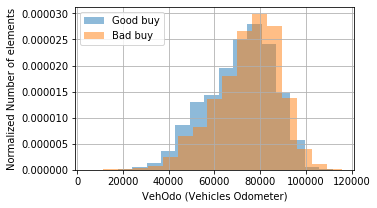

In [90]:
plt.figure(figsize=(5,3))
df[df['IsBadBuy']==0]['VehOdo'].hist(bins=17, 
                                   label='Good buy', alpha=0.5, density=True)
df[df['IsBadBuy']==1]['VehOdo'].hist(bins=17,
                                  label='Bad buy', alpha=0.5, density=True)
plt.xlabel("VehOdo (Vehicles Odometer)")
plt.ylabel("Normalized Number of elements")
plt.legend()
plt.show()

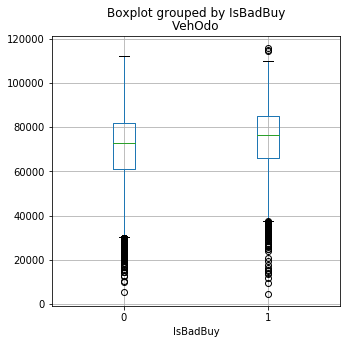

In [137]:
boxplot = df.boxplot(column=['VehOdo'], figsize=(5,5), by='IsBadBuy')

<p>Bad purchases have an in average an higher value of VehOdo.</p>

### - Nationality

In [138]:
df['Nationality'].describe()

count        58382
unique           4
top       AMERICAN
freq         48800
Name: Nationality, dtype: object

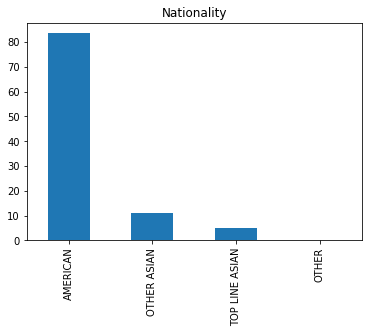

In [139]:
(df['Nationality'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Nationality')
plt.show() 

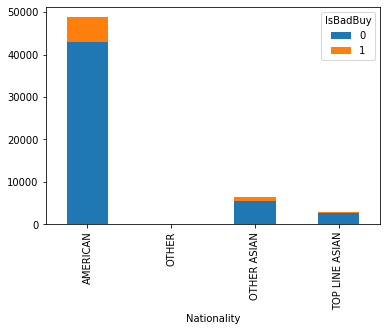

In [44]:
m_xt = pd.crosstab(df['Nationality'], df['IsBadBuy']) #the result of this corsstable will be assigned to a variable
#Then I can visualize it with a bar plot (staked: different values in the same bar)
m_xt.plot(kind='bar', stacked=True)
plt.show()

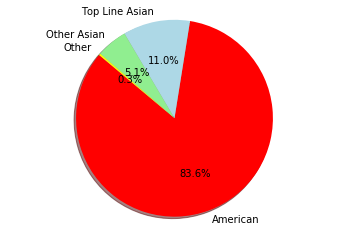

In [140]:
#Pie chart of Nationality
# Data to plot
labels = 'American', 'Top Line Asian', 'Other Asian', 'Other'
sizes = [48800, 6435, 2995, 152]
colors = ['red', 'lightblue', 'lightgreen', 'yellow']
explode = (0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [141]:
df[df['Nationality']=='OTHER']['Make'].value_counts()

VOLKSWAGEN    104
VOLVO          31
MINI           17
Name: Make, dtype: int64

<ul>
    <li> American cars are predominant.
    <li> In OTHER there are all European cars.
    <li> The four missing values can be replaced with AMERICAN.
</ul>

### - Size

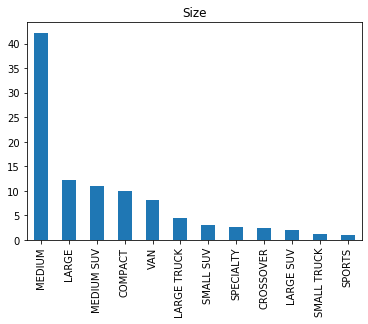

In [142]:
(df['Size'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='Size')
plt.show() 

In [185]:
df["Size"].value_counts()

MEDIUM         24644
LARGE           7120
MEDIUM SUV      6398
COMPACT         5764
VAN             4677
LARGE TRUCK     2554
SMALL SUV       1805
SPECIALTY       1527
CROSSOVER       1419
LARGE SUV       1157
SMALL TRUCK      696
SPORTS           621
Name: Size, dtype: int64

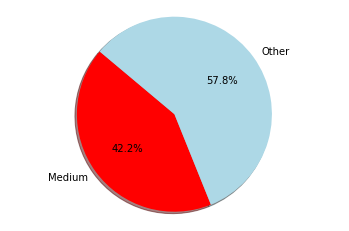

In [186]:
#Pie chart of Size
# Data to plot
labels = 'Medium', 'Other'
sizes = [24644, 33738]
colors = ['red', 'lightblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [143]:
df['Size'].describe()

count      58382
unique        12
top       MEDIUM
freq       24644
Name: Size, dtype: object

<p>The most frequent value is MEDIUM.</p>

### - TopThreeAmericanName

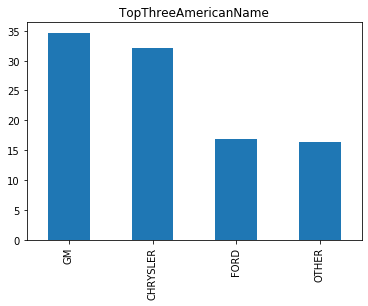

In [144]:
(df['TopThreeAmericanName'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='TopThreeAmericanName')
plt.show() 

In [145]:
df[df['TopThreeAmericanName'].isnull()]['Make'].value_counts()

JEEP     2
GMC      1
DODGE    1
Name: Make, dtype: int64

<p>We can fill these missing values with:</p>
<ul>
    <li> JEEP - CHRYSLER
    <li> GMC - GM
    <li> DODGE - CHRYSLER
</ul>
<p>Useless because we are going to eliminate this attrubute.</p>

### - MMRs

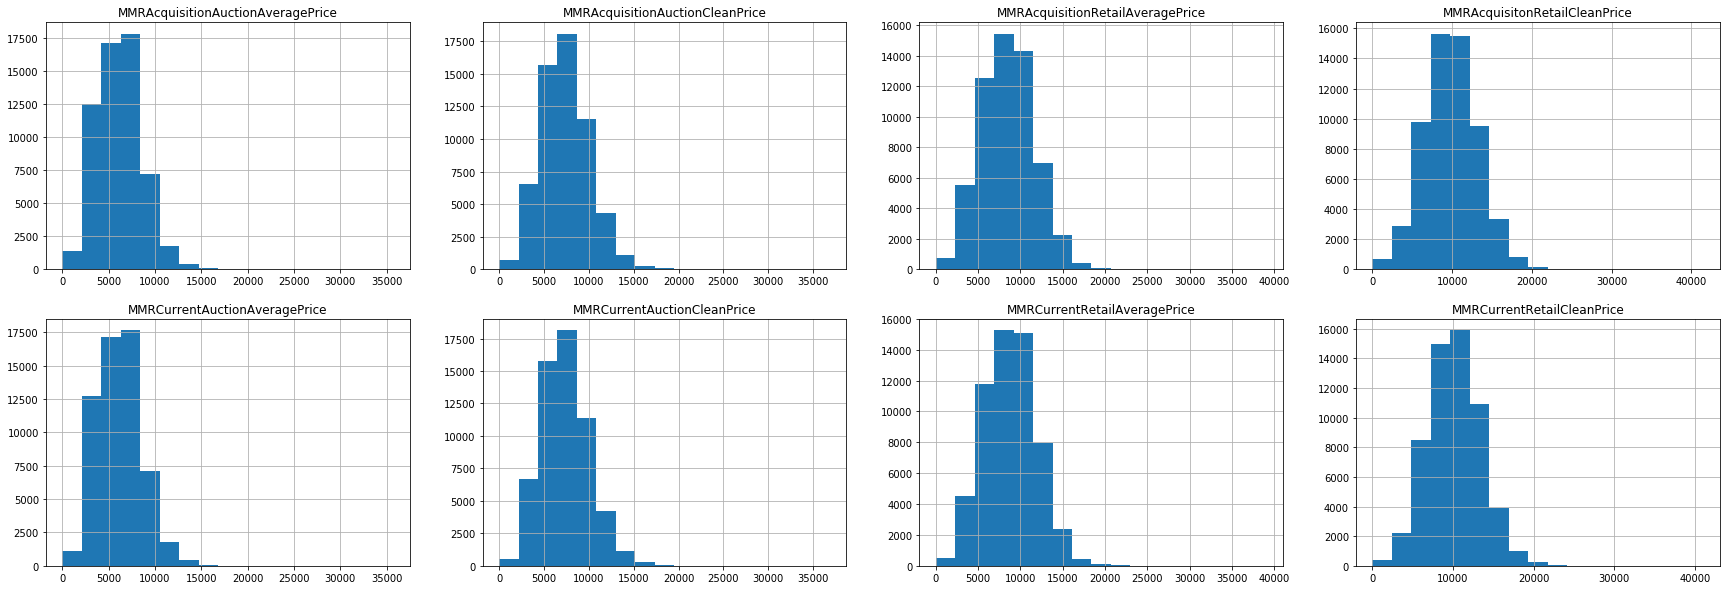

In [146]:
fig = plt.figure(figsize=(30, 10)) # any figure has 10x10 size
fig_dims = (2, 4) # 2 rows and 4 collums 
b = 17
plt.subplot2grid(fig_dims, (0, 0))
df['MMRAcquisitionAuctionAveragePrice'].hist(bins = b)
plt.title('MMRAcquisitionAuctionAveragePrice')

plt.subplot2grid(fig_dims, (0, 1))
df['MMRAcquisitionAuctionCleanPrice'].hist(bins = b)
plt.title('MMRAcquisitionAuctionCleanPrice')

plt.subplot2grid(fig_dims, (0, 2))
df['MMRAcquisitionRetailAveragePrice'].hist(bins = b)
plt.title('MMRAcquisitionRetailAveragePrice')

plt.subplot2grid(fig_dims, (0, 3))
df['MMRAcquisitonRetailCleanPrice'].hist(bins = b)
plt.title('MMRAcquisitonRetailCleanPrice')

plt.subplot2grid(fig_dims, (1, 0))
df['MMRCurrentAuctionAveragePrice'].hist(bins = b)
plt.title('MMRCurrentAuctionAveragePrice')

plt.subplot2grid(fig_dims, (1, 1))
df['MMRCurrentAuctionCleanPrice'].hist(bins = b)
plt.title('MMRCurrentAuctionCleanPrice')

plt.subplot2grid(fig_dims, (1, 2))
df['MMRCurrentRetailAveragePrice'].hist(bins = b)
plt.title('MMRCurrentRetailAveragePrice')

plt.subplot2grid(fig_dims, (1, 3))
df['MMRCurrentRetailCleanPrice'].hist(bins = b)
plt.title('MMRCurrentRetailCleanPrice')


plt.show()

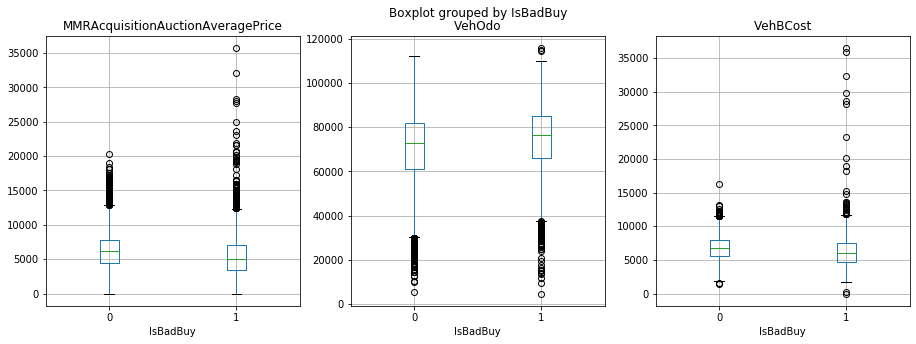

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5)) # create 2x2 array of subplots

df.boxplot(column=['MMRAcquisitionAuctionAveragePrice'], figsize=(4,6), by='IsBadBuy', ax=axes[0])
plt.title('MMRAcquisitionAuctionAveragePrice')

df.boxplot(column=['VehOdo'], figsize=(4,6), by='IsBadBuy', ax=axes[1])
plt.title('VehOdo')

df.boxplot(column=['VehBCost'], figsize=(5,6), by='IsBadBuy', ax=axes[2])
plt.title('VehBCost')
plt.show()

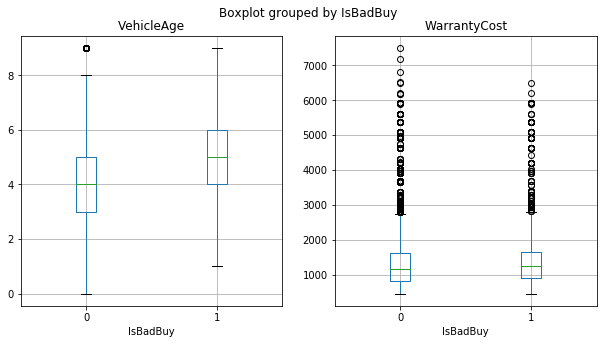

In [13]:
#df.boxplot(column=['MMRAcquisitionRetailAveragePrice'], figsize=(4,6), by='IsBadBuy', ax=axes[1,0])
#plt.title('MMRAcquisitionRetailAveragePrice')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) # create 2x2 array of subplots

df.boxplot(column=['VehicleAge'], figsize=(5,6), by='IsBadBuy', ax=axes[0])
plt.title('VehicleAge')

df.boxplot(column=['WarrantyCost'], figsize=(5,6), by='IsBadBuy', ax=axes[1])
plt.title('WarrantyCost')
plt.show()

#### - MMRAcquisitionAuctionAveragePrice

In [147]:
df['MMRAcquisitionAuctionAveragePrice'].describe()

count    58373.000000
mean      6128.127953
std       2456.632611
min          0.000000
25%       4273.000000
50%       6097.000000
75%       7765.000000
max      35722.000000
Name: MMRAcquisitionAuctionAveragePrice, dtype: float64

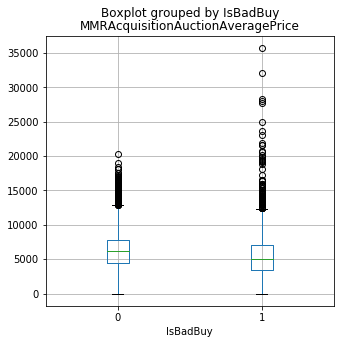

In [148]:
boxplot = df.boxplot(column=['MMRAcquisitionAuctionAveragePrice'], figsize=(5,5), by='IsBadBuy')

#### - MMRAcquisitionAuctionCleanPrice

In [149]:
df['MMRAcquisitionAuctionCleanPrice'].describe()

count    58373.000000
mean      7372.912699
std       2715.506462
min          0.000000
25%       5409.000000
50%       7308.000000
75%       9017.000000
max      36859.000000
Name: MMRAcquisitionAuctionCleanPrice, dtype: float64

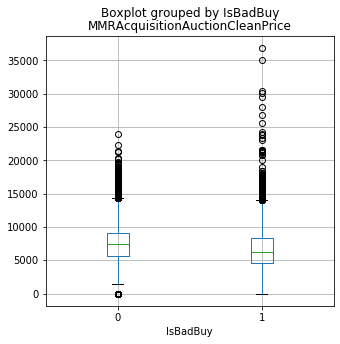

In [150]:
boxplot = df.boxplot(column=['MMRAcquisitionAuctionCleanPrice'], figsize=(5,5), by='IsBadBuy')

#### - MMRAcquisitionRetailAveragePrice

In [151]:
df['MMRAcquisitionRetailAveragePrice'].describe()

count    58373.000000
mean      8497.288558
std       3151.106237
min          0.000000
25%       6279.000000
50%       8448.000000
75%      10652.000000
max      39080.000000
Name: MMRAcquisitionRetailAveragePrice, dtype: float64

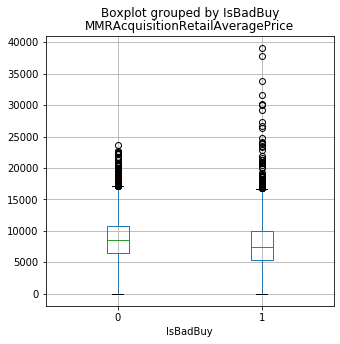

In [152]:
boxplot = df.boxplot(column=['MMRAcquisitionRetailAveragePrice'], figsize=(5,5), by='IsBadBuy')

#### - MMRAcquisitonRetailCleanPrice

In [153]:
df['MMRAcquisitonRetailCleanPrice'].describe()

count    58373.000000
mean      9851.768061
std       3378.839613
min          0.000000
25%       7501.000000
50%       9798.000000
75%      12084.000000
max      41482.000000
Name: MMRAcquisitonRetailCleanPrice, dtype: float64

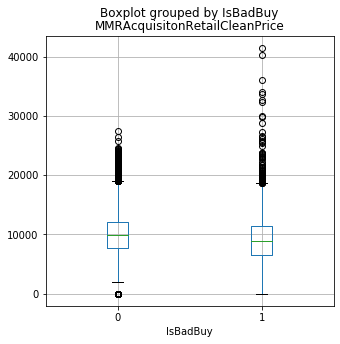

In [154]:
boxplot = df.boxplot(column=['MMRAcquisitonRetailCleanPrice'], figsize=(5,5), by='IsBadBuy')

#### - MMRCurrentAuctionAveragePrice

In [155]:
df['MMRCurrentAuctionAveragePrice'].describe()

count    58141.000000
mean      6131.666655
std       2432.171539
min          0.000000
25%       4275.000000
50%       6063.000000
75%       7737.000000
max      35722.000000
Name: MMRCurrentAuctionAveragePrice, dtype: float64

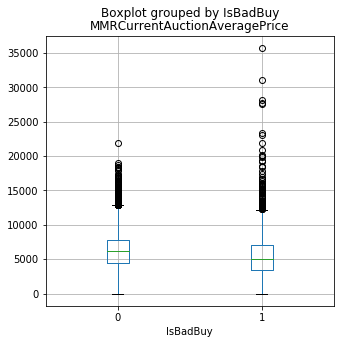

In [156]:
boxplot = df.boxplot(column=['MMRCurrentAuctionAveragePrice'], figsize=(5,5), by='IsBadBuy')

#### - MMRCurrentAuctionCleanPrice

In [157]:
df['MMRCurrentAuctionCleanPrice'].describe()

count    58141.000000
mean      7389.958652
std       2682.310828
min          0.000000
25%       5415.000000
50%       7311.000000
75%       9014.000000
max      36859.000000
Name: MMRCurrentAuctionCleanPrice, dtype: float64

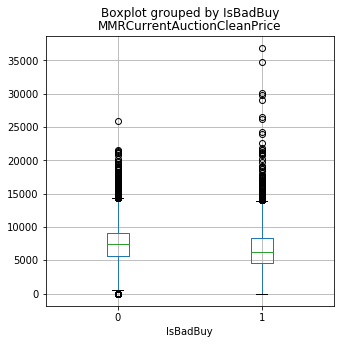

In [158]:
boxplot = df.boxplot(column=['MMRCurrentAuctionCleanPrice'], figsize=(5,5), by='IsBadBuy')

#### -  MMRCurrentRetailAveragePrice

In [159]:
df['MMRCurrentRetailAveragePrice'].describe()

count    58141.000000
mean      8776.065118
std       3086.373733
min          0.000000
25%       6538.000000
50%       8733.000000
75%      10910.000000
max      39080.000000
Name: MMRCurrentRetailAveragePrice, dtype: float64

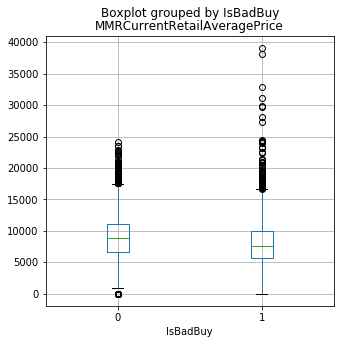

In [160]:
boxplot = df.boxplot(column=['MMRCurrentRetailAveragePrice'], figsize=(5,5), by='IsBadBuy')

#### - MMRCurrentRetailCleanPrice

In [161]:
df['MMRCurrentRetailCleanPrice'].describe()

count    58141.000000
mean     10145.227034
std       3304.637060
min          0.000000
25%       7788.000000
50%      10103.000000
75%      12309.000000
max      41062.000000
Name: MMRCurrentRetailCleanPrice, dtype: float64

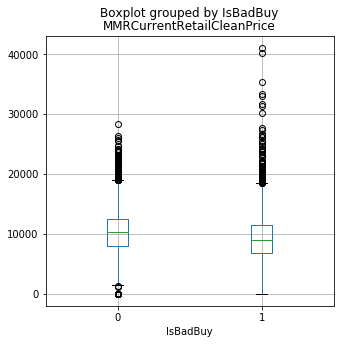

In [162]:
boxplot = df.boxplot(column=['MMRCurrentRetailCleanPrice'], figsize=(5,5), by='IsBadBuy')

<p>Presence of outliers in all the MMRs values.</p>

### - PRIMEUNIT

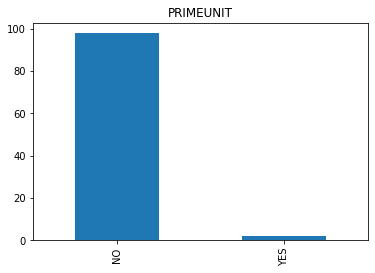

In [163]:
(df['PRIMEUNIT'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='PRIMEUNIT')
plt.show()

In [164]:
df['PRIMEUNIT'].isnull().sum()

55703

<p>Too many missing values. A strong correlation with AUCGUART.</p>

### - AUCGUART

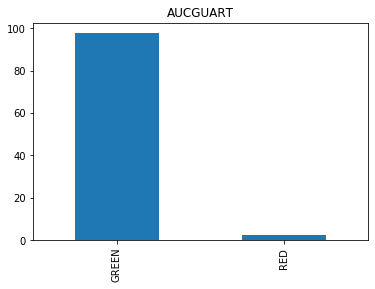

In [165]:
(df['AUCGUART'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='AUCGUART')
plt.show()

In [166]:
df['AUCGUART'].isnull().sum()

55703

<p>Too many missing values. A strong correlation with PRIMEUNIT</p>

### - BYRNO

In [167]:
df['BYRNO'].value_counts()

99761    3191
18880    2852
835      2398
3453     2362
22916    2285
         ... 
10420       3
1157        1
10425       1
99741       1
1086        1
Name: BYRNO, Length: 72, dtype: int64

In [168]:
df['BYRNO'].unique()

array([ 5546, 99750, 99761, 20833, 21053, 99740, 20234, 18880, 18111,
       19619, 18822, 22916, 17212, 20740,   835, 17675, 52598,  3453,
       23359,  1191, 21047, 19662,  8655,  1231, 16044, 20928, 20207,
       22808,  1235, 18881, 25100, 10315, 16926, 21973, 19064,  8172,
       20392, 19638, 52646, 52644, 23657,  1045, 52117,  1035, 52492,
        1121,  1151, 10430, 10310, 11410,  1156,  1085, 53245, 18091,
        1081,  1125,  1031,  1051,  1041,  1141, 99741, 10410,  1157,
       16369, 10510,  1152, 11210,  1055, 10425,  1082,  1086, 10420],
      dtype=int64)

### - VNZIP1

In [169]:
df['VNZIP1'].unique()

array([33619, 32124, 74135, 85018, 75236, 85226, 34203, 29532, 97217,
       30272, 37210, 32824, 78219, 89165, 78754, 95673, 39402, 27542,
       85009, 28273, 80817, 91770, 80022, 33809, 29697, 28625, 94544,
       33314, 80011, 34761, 77086, 77061, 50111, 22801, 37771, 77041,
       21075, 78745, 90045, 27407, 32219, 92504, 60440, 84104, 76040,
       30212, 64161, 30315, 79605, 92807, 75050, 80229, 78227, 38637,
       19440, 35004, 30331, 91752, 73108, 70401, 75061, 76063, 92337,
       46239, 45005, 83716, 22403, 97060, 84087, 33411, 35613, 17545,
       20166, 47129, 87105, 85040, 89120, 70460, 38118, 32750, 21014,
        8505, 32812, 29461, 90650, 23606, 85353, 55369, 37122, 33073,
       30120, 46803, 29070, 33311, 75020, 33762, 62207, 91763, 37421,
       79932, 26431, 92057, 39208, 25177, 17406, 63044, 85284, 77073,
       17028, 71119, 92101, 60443, 98064, 60445, 42104, 32772, 33916,
       78426,  2764,  3106, 23234, 73129, 48265, 78610, 83687, 68138,
       89139, 45011,

In [170]:
df['VNZIP1'].value_counts()

32824    2937
27542    2716
75236    1923
74135    1883
80022    1697
         ... 
25071       1
85248       1
85338       1
80112       1
76101       1
Name: VNZIP1, Length: 152, dtype: int64

### - VNST

In [171]:
df['VNST'].unique()

array(['FL', 'OK', 'AZ', 'TX', 'SC', 'OR', 'GA', 'TN', 'NV', 'CA', 'MS',
       'NC', 'CO', 'IA', 'VA', 'MD', 'IL', 'UT', 'MO', 'PA', 'AL', 'LA',
       'IN', 'OH', 'ID', 'NM', 'NJ', 'MN', 'WV', 'WA', 'KY', 'MA', 'NH',
       'MI', 'NE', 'AR', 'NY'], dtype=object)

In [197]:
df['VNST'].value_counts() #tot=58386

TX    10880
FL     8317
CA     5673
NC     5611
AZ     4966
CO     4052
SC     3394
OK     2898
GA     1965
TN     1415
VA     1327
MD      930
UT      699
PA      673
OH      622
MO      591
AL      548
NV      443
MS      408
IA      398
IN      384
IL      376
LA      277
NJ      261
WV      222
NM      202
KY      183
ID      162
OR      160
WA      112
NH       80
AR       56
MN       51
NE       23
MI       12
MA       11
NY        4
Name: VNST, dtype: int64

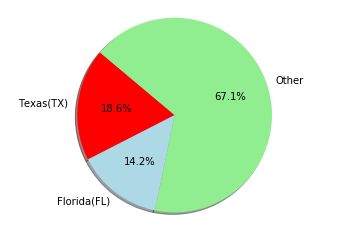

In [198]:
#Pie chart of VNST
# Data to plot
labels = 'Texas(TX)', 'Florida(FL)', 'Other'
sizes = [10880, 8317, 39189]
colors = ['red', 'lightblue', 'lightgreen']
explode = (0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

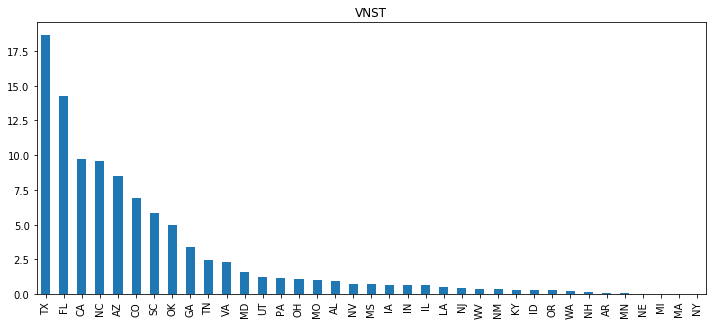

In [172]:
(df['VNST'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='VNST', figsize=(12,5))
plt.show()

In [9]:
x = df['VNST'].unique()
b = []
for a in range (0,37):
    b.append(x[a])
    
stat = pd.Series(b)
v = np.array([8317,2898,4966,10880,3394,160,1965,1415,443,5673,408,5611,4052,398,1327,930,376,699,591,673,548,277,384,
              622,162,202,261,51,222,112,183,11,80,12,23,56,4])
val = pd.Series(v)

In [10]:
ff = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
fig = go.Figure(data=go.Choropleth(
    locations=stat, # Spatial coordinates
    z = val.astype(int), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Vehicles",
))

fig.update_layout(
    title_text = 'Vehicles purchased by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

<p>Texas (10880), Florida (8317), California (5673) and North Carolina (5611) are the states where more vehicles are purchased</p>

### - VehBCost

In [175]:
df['VehBCost'].describe() #media

count    58386.000000
mean      6730.008335
std       1762.075265
min          1.000000
25%       5430.000000
50%       6700.000000
75%       7900.000000
max      36485.000000
Name: VehBCost, dtype: float64

Text(0, 0.5, 'Number of elements')

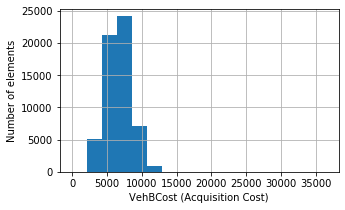

In [91]:
plt.figure(figsize=(5,3))
df['VehBCost'].hist(bins=17)
plt.xlabel("VehBCost (Acquisition Cost)")
plt.ylabel("Number of elements")

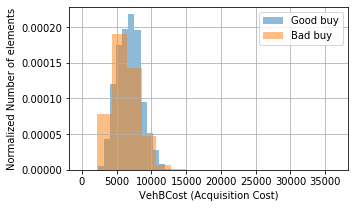

In [92]:
plt.figure(figsize=(5,3))
df[df['IsBadBuy']==0]['VehBCost'].hist(bins=17, 
                                   label='Good buy', alpha=0.5, density=True)
df[df['IsBadBuy']==1]['VehBCost'].hist(bins=17,
                                  label='Bad buy', alpha=0.5, density=True)
plt.xlabel("VehBCost (Acquisition Cost)")
plt.ylabel("Normalized Number of elements")
plt.legend()
plt.show()

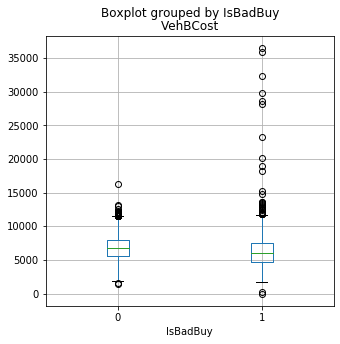

In [178]:
boxplot = df.boxplot(column=['VehBCost'], figsize=(5,5), by='IsBadBuy')

### - IsOnlineSale

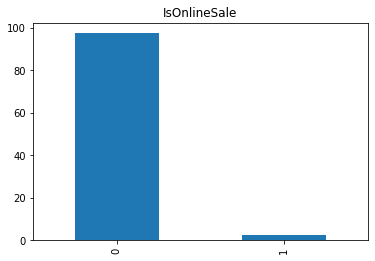

In [179]:
(df['IsOnlineSale'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='IsOnlineSale')
plt.show()

### - WarrantyCost

In [180]:
df.WarrantyCost.describe()

count    58386.000000
mean      1276.105042
std        598.885423
min        462.000000
25%        837.000000
50%       1155.000000
75%       1623.000000
max       7498.000000
Name: WarrantyCost, dtype: float64

Text(0, 0.5, 'Number of elements')

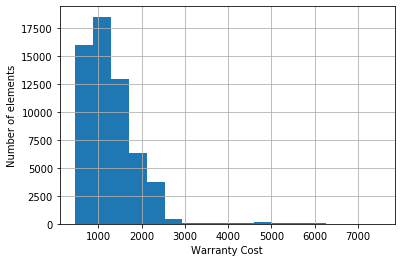

In [19]:
p = df['WarrantyCost'].hist(bins=17)
p.set_xlabel("Warranty Cost")
p.set_ylabel("Number of elements")

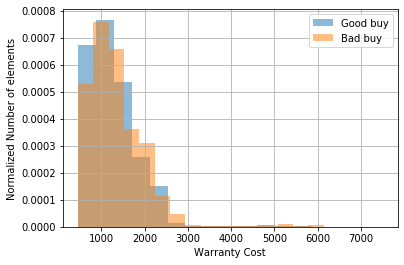

In [21]:
df[df['IsBadBuy']==0]['WarrantyCost'].hist(bins=17, 
                                   label='Good buy', alpha=0.5, density=True)
p = df[df['IsBadBuy']==1]['WarrantyCost'].hist(bins=17,
                                  label='Bad buy', alpha=0.5, density=True)
p.set_xlabel("Warranty Cost")
p.set_ylabel("Normalized Number of elements")
plt.legend()
plt.show()

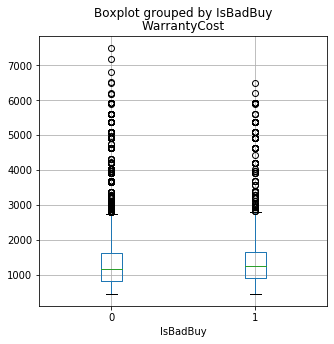

In [183]:
boxplot = df.boxplot(column=['WarrantyCost'], figsize=(5,5), by='IsBadBuy')